In [1]:
from pycaret.regression import setup, compare_models, evaluate_model, predict_model, save_model, load_model, plot_model, get_config, interpret_model

In [4]:
import pandas as pd
weather = pd.read_csv('../../Data/data_fix_temp.txt')

columns_to_drop=[
    't_obs', 
    'lokasi',
    'Date', 
    'con_prec.mm.', 
    'mic_prec.mm.', 
    'sha_prec.mm.',
    'lcloud...',	
    'mcloud...', 
    'hcloud...', 
    'clmix.kg.kg.', 
    'wamix.kg.kg.', 
    'hari', 
    'UTC', 
    'LAT', 
    'LON',
    ]

features =  weather.drop(columns=columns_to_drop) 
target = weather['t_obs']

In [5]:
feature_train = features[:int(features.shape[0] * 0.8)]
y_tr = target[:int(target.shape[0] * 0.8)]
# test = X[int(X.shape[0] * 0.9):int(X.shape[0] * 0.95)]
feature_val = features[int(features.shape[0] * 0.8):]
y_val = target[int(target.shape[0] * 0.8):]

In [6]:
s = setup(feature_train, target=y_tr, train_size=0.9, n_jobs=6, use_gpu=True, normalize = True, data_split_shuffle=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

,Description,Value
0,Session id,6224
1,Target,t_obs
2,Target type,Regression
3,Original data shape,"(435419, 25)"
4,Transformed data shape,"(435419, 25)"
5,Transformed train set shape,"(391877, 25)"
6,Transformed test set shape,"(43542, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

In [7]:
compare_models??

Signature:
compare_models(
    include: Union[List[Union[str, Any]], NoneType] = None,
    exclude: Union[List[str], NoneType] = None,
    fold: Union[int, Any, NoneType] = None,
    round: int = 4,
    cross_validation: bool = True,
    sort: str = 'R2',
    n_select: int = 1,
    budget_time: Union[float, NoneType] = None,
    turbo: bool = True,
    errors: str = 'ignore',
    fit_kwargs: Union[dict, NoneType] = None,
    groups: Union[str, Any, NoneType] = None,
    experiment_custom_tags: Union[Dict[str, Any], NoneType] = None,
    engine: Union[Dict[str, str], NoneType] = None,
    verbose: bool = True,
    parallel: Union[pycaret.internal.parallel.parallel_backend.ParallelBackend, NoneType] = None,
)
Source:   
@check_if_global_is_not_none(globals(), _CURRENT_EXPERIMENT_DECORATOR_DICT)
def compare_models(
    include: Optional[List[Union[str, Any]]] = None,
    exclude: Optional[List[str]] = None,
    fold: Optional[Union[int, Any]] = None,
    round: int = 4,
    cross_validati

In [8]:
best_model = compare_models(sort='rmse', cross_validation=False, budget_time = 0.6)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.1385,2.3059,1.5185,0.7610,0.0537,0.0421,0.4000
lr,Linear Regression,1.2462,2.5938,1.6105,0.7311,0.0572,0.0462,0.8500
ridge,Ridge Regression,1.2462,2.5938,1.6105,0.7311,0.0572,0.0462,0.4400
lar,Least Angle Regression,1.2462,2.5938,1.6105,0.7311,0.0572,0.0462,0.4400
br,Bayesian Ridge,1.2462,2.5938,1.6105,0.7311,0.0572,0.0462,0.6400
huber,Huber Regressor,1.2403,2.6077,1.6148,0.7297,0.0574,0.0461,4.1300
omp,Orthogonal Matching Pursuit,1.3701,3.0695,1.7520,0.6818,0.0629,0.0511,0.4300
dt,Decision Tree Regressor,1.4389,3.8634,1.9655,0.5995,0.0693,0.0530,16.9300
en,Elastic Net,1.6006,3.9041,1.9759,0.5953,0.0712,0.0597,0.5100
lasso,Lasso Regression,1.6507,4.1215,2.0302,0.5728,0.0731,0.0616,0.5200


In [9]:
train_data = get_config(variable='X_train')
test_data = get_config(variable='X_test')

In [10]:
train_data

,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,surpre.Pa.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
410842,19.772800,19.727200,99.899399,2.487420,135.852005,88012.296875,285.147003,274.808014,93.282997,670.281006,...,135.475998,16.195299,81.080902,4.017650,90.194603,-4.53490,17.490601,5.24912,111.028999,1070
82042,31.479601,22.298500,58.341499,1.316610,155.313995,100339.000000,280.403015,1288.640015,1272.380005,1358.160034,...,150.481995,15.838300,69.998001,0.894963,242.248001,-4.11318,60.480202,3.61506,203.660995,19
264929,29.389601,22.455400,66.399597,4.522980,323.412994,100560.000000,289.476990,552.435974,968.927002,709.458008,...,317.867004,14.256000,97.323601,5.358580,114.790001,-3.63452,17.865200,7.13826,83.270401,2
274611,27.570601,25.156200,86.823402,2.061640,113.584999,100875.000000,217.046005,480.993011,436.700012,2244.780029,...,71.425598,15.790400,83.965302,2.421750,88.904999,-4.76368,71.027802,5.26162,49.546101,7
290732,26.301901,24.189301,88.302696,1.147070,63.273300,100871.000000,224.048004,297.399994,457.713989,1152.579956,...,350.300995,14.933100,94.419296,2.907270,253.179993,-4.43668,69.219498,1.77672,67.310699,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104150,22.282600,22.255600,100.000000,1.335750,256.910004,101025.000000,266.471008,97.886398,266.532990,652.627014,...,320.084015,14.329100,90.209099,6.010830,289.536987,-5.12973,65.314903,4.94050,70.684502,10
418394,26.642401,22.334700,77.377899,7.757320,186.587997,99330.203125,288.403992,546.356995,715.559998,244.039993,...,185.725998,17.070200,48.823502,4.199270,102.325996,-5.54657,58.822201,6.40901,73.489304,9
123697,21.741100,17.607500,77.499199,2.832060,329.368011,92643.398438,207.923996,359.013000,584.549011,-0.100000,...,317.454987,15.189800,76.939499,5.998340,277.752991,-5.47842,85.682999,5.93463,301.350006,517
412857,19.509199,19.168400,98.081299,1.218060,54.868401,87753.601562,261.539001,527.288025,124.914001,713.700989,...,56.028301,15.020500,100.000000,2.284740,43.090000,-4.56497,34.852901,3.60098,119.169998,1070


In [13]:
pred_df = predict_model(best_model, feature_val, verbose=True)

In [19]:
pred_df_target = pred_df[['prediction_label']]
pred_df_target

,prediction_label
435420,31.360001
435421,30.060001
435422,26.400000
435423,25.400000
435424,25.320000
...,...
544270,31.020000
544271,33.260002
544272,29.560001
544273,26.900000


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, pred_df_target)
rmse = mean_squared_error(y_val, pred_df_target, squared=False)
mae = mean_absolute_error(y_val, pred_df_target)
r2 = r2_score(y_val, pred_df_target)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}\n')

Mean Squared Error: 3.840293886281027
Root Mean Squared Error: 1.9596667793992495
Mean Absolute Error: 1.5351327962421113
R2 Score: 0.6236290452809375



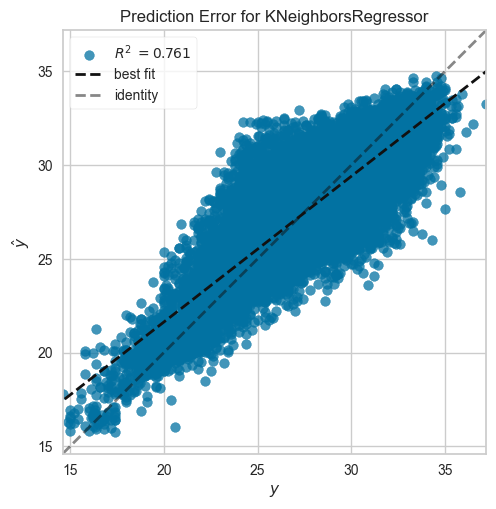

In [28]:
plot_model(best_model, plot='error')

In [29]:
from pycaret.regression import tune_model
best_model_tuned = tune_model(best_model, optimize='rmse', early_stopping=True, return_tuner=True, tuner_verbose=True, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:00:53
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 